In [1]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
# Define folder paths to your 10x Genomics data
folder1 <- "/tmp/test/BD_Rhapsody_expression/"
folder2 <- "/tmp/test2/BD_Rhapsody_expression/"

# Read the 10x data into Seurat objects
seurat1 <- Read10X(folder1)
seurat2 <- Read10X(folder2)

In [3]:
# Create Seurat objects
seurat_obj1 <- CreateSeuratObject(counts = seurat1)
seurat_obj2 <- CreateSeuratObject(counts = seurat2)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [4]:
# Find common genes and barcodes
common_genes <- intersect(rownames(seurat_obj1), rownames(seurat_obj2))
common_barcodes <- intersect(colnames(seurat_obj1), colnames(seurat_obj2))

In [5]:
seurat_obj1

An object of class Seurat 
48 features across 24039 samples within 1 assay 
Active assay: RNA (48 features, 0 variable features)
 1 layer present: counts

In [6]:
seurat_obj2

An object of class Seurat 
48 features across 24039 samples within 1 assay 
Active assay: RNA (48 features, 0 variable features)
 1 layer present: counts

In [7]:
diff_genes = setdiff(rownames(seurat_obj1), rownames(seurat_obj2))
print( "genes in 1 and not 2" )
diff_genes

[1] "genes in 1 and not 2"


character(0)

In [8]:
diff_genes = setdiff(rownames(seurat_obj2), rownames(seurat_obj1))
print( "genes in 2 and not 1" )
diff_genes

[1] "genes in 2 and not 1"


character(0)

In [9]:
diff_cells = setdiff(colnames(seurat_obj1), colnames(seurat_obj2))
print( "cells in 1 and not 2" )
diff_cells

[1] "cells in 1 and not 2"


character(0)

In [10]:
diff_cells = setdiff(colnames(seurat_obj2), colnames(seurat_obj1))
print( "cells in 2 and not 1" )
diff_cells

[1] "cells in 2 and not 1"


character(0)

In [11]:
rowSums(GetAssayData(seurat_obj2, layer = "counts"))

Igkv8-16-unspliced                     Igkv6-14 
                           2                            1 
          Igkv6-23-unspliced                     Igkv8-26 
                           1                            1 
           Igkv3-4-unspliced                      Gm30211 
                           2                          106 
                  Igkv3-12-1            Igkv3-2-unspliced 
                           1                            2 
                     Gm42720                         Igkc 
                           1                        41382 
ENSMUSG00000119951-unspliced                     Igkv6-25 
                           6                            4 
                     Igkv3-3                     Igkv8-16 
                           1                            1 
                     Igkv3-4           Igkv8-24-unspliced 
                          10                            1 
           Igkv3-7-unspliced ENSMUSG00000120845-unspliced 
                           2                            1 
                     Igkv3-5                        Igkj1 
                           5                          653 
          Igkv3-10-unspliced                     Igkv3-10 
                           2                            1 
             Igkj3-unspliced                      Igkv3-2 
                           1                            3 
                     Igkv3-7           Igkv6-25-unspliced 
                           4                           30 
           Igkv3-3-unspliced               Igkc-unspliced 
                           1                         2558 
          Igkv3-12-unspliced                      Igkv3-1 
                           2                           14 
             Igkj2-unspliced              Igkj1-unspliced 
                         263                          281 
                       Igkj2                        Igkj4 
                         531                          291 
             Igkj5-unspliced                     Igkv3-11 
                         145                            3 
           Gm30211-unspliced           Igkv6-13-unspliced 
                         486                            5 
                    Igkv6-17           Igkv6-17-unspliced 
                           3                           16 
             Igkj4-unspliced                     Igkv6-13 
                         263                            2 
                     Igkv3-6                      Gm10360 
                           1                            1 
          ENSMUSG00000119951            Igkv3-1-unspliced 
                           3                            2 
                       Igkj5           Igkv8-18-unspliced 
                         294                            1

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


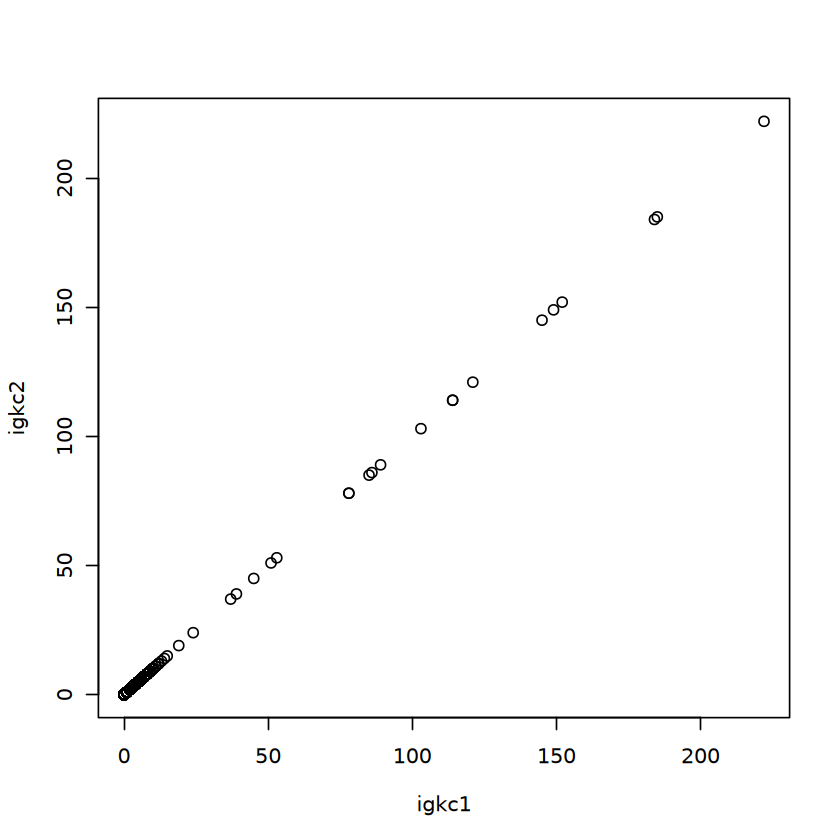

In [12]:
igkc1 <- GetAssayData(seurat_obj1[,common_barcodes], slot = "counts")["Igkc", ]   # For folder1
igkc2 <- GetAssayData(seurat_obj2[,common_barcodes], slot = "counts")["Igkc", ]   # For folder2

plot(igkc1, igkc2 )

In [13]:
match ( diff_genes , rownames(seurat_obj1))

integer(0)

In [14]:
match ( diff_genes , rownames(seurat_obj2))

integer(0)

In [15]:
diff_cells = setdiff(colnames(seurat_obj1), colnames(seurat_obj2))
diff_cells

character(0)

In [16]:
common_genes

[1] "Igkv8-16"                     "Igkj5-unspliced"             
 [3] "Igkv6-17"                     "Gm30211-unspliced"           
 [5] "Igkc"                         "Igkj4"                       
 [7] "Igkv3-10"                     "Igkv6-13"                    
 [9] "ENSMUSG00000120845-unspliced" "Igkv3-12-1"                  
[11] "Igkv3-4-unspliced"            "Igkv6-25"                    
[13] "Igkv8-18-unspliced"           "Igkv3-3-unspliced"           
[15] "Igkc-unspliced"               "Igkv6-17-unspliced"          
[17] "Igkv3-7-unspliced"            "Igkj2-unspliced"             
[19] "Igkv3-2"                      "Igkj4-unspliced"             
[21] "Gm30211"                      "Igkj3-unspliced"             
[23] "Igkj2"                        "Igkv6-13-unspliced"          
[25] "Igkv3-12-unspliced"           "Igkv3-2-unspliced"           
[27] "Gm10360"                      "Igkv3-4"                     
[29] "Gm42720"                      "Igkj1"                       
[31] "Igkv3-6"                      "Igkv6-23-unspliced"          
[33] "Igkv8-16-unspliced"           "Igkv3-1"                     
[35] "Igkv3-3"                      "Igkv3-7"                     
[37] "Igkj5"                        "Igkv8-24-unspliced"          
[39] "Igkv8-26"                     "ENSMUSG00000119951"          
[41] "Igkv3-1-unspliced"            "Igkv3-11"                    
[43] "Igkj1-unspliced"              "Igkv3-10-unspliced"          
[45] "Igkv3-5"                      "Igkv6-14"                    
[47] "Igkv6-25-unspliced"           "ENSMUSG00000119951-unspliced"